In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

import os
os.makedirs("../../data/raw/", exist_ok=True)

Load data from folder containing parquets

In [4]:
# Read all of the exmaple parquets
# df = pd.read_parquet("../../data/raw/")

# Read only first 5 parquet files to reduce memory usage
import glob
parquet_files = glob.glob("../../data/raw/*.parquet")[:5]
df = pd.read_parquet(parquet_files)

print(f"Number of samples in all parquets in the folder: {len(df)}")

Number of samples in all parquets in the folder: 16183


Load Meta data for information about the spectrum

In [5]:
with open("../../data/meta_data/meta_data_dict.json") as json_file:
    meta_data = json.load(json_file)

meta_data.keys()

dict_keys(['smiles', 'molecular_formula', 'h_nmr_spectra', 'c_nmr_spectra', 'h_nmr_peaks', 'c_nmr_peaks', 'hsqc_nmr_spectrum', 'hsqc_nmr_peaks', 'ir_spectra', 'msms_cfmid_positive_10ev', 'msms_cfmid_positive_20ev', 'msms_cfmid_positive_40ev', 'msms_cfmid_fragments_positive', 'msms_cfmid_negative_10ev', 'msms_cfmid_negative_20ev', 'msms_cfmid_negative_40ev', 'msms_cfmid_fragments_negative', 'msms_iceberg_positive', 'msms_iceberg_fragments_positive', 'msms_scarf_positive', 'msms_scarf_fragments_positive'])

## Plot IR spectrum

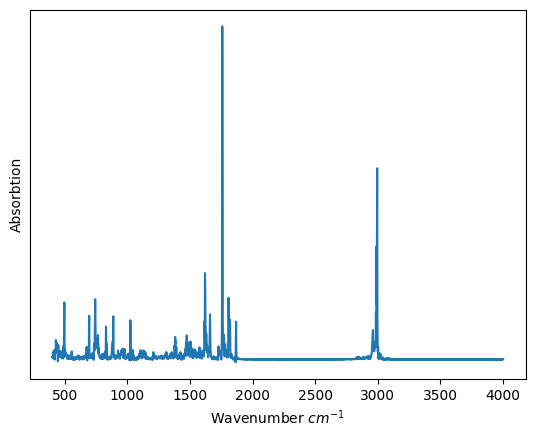

In [16]:
random_sample = df.sample(1)

ir_spectrum = random_sample["ir_spectra"].tolist()[0]
ir_dimension = meta_data["ir_spectra"]["dimensions"]


plt.plot(ir_dimension, ir_spectrum)
plt.xlabel("Wavenumber $cm^{-1}$")
plt.ylabel("Absorbtion")
plt.gca().axes.get_yaxis().set_ticks([])
plt.show()

Correct the wave number so it matches how spectras are usually plotted, change from absorption to transmission

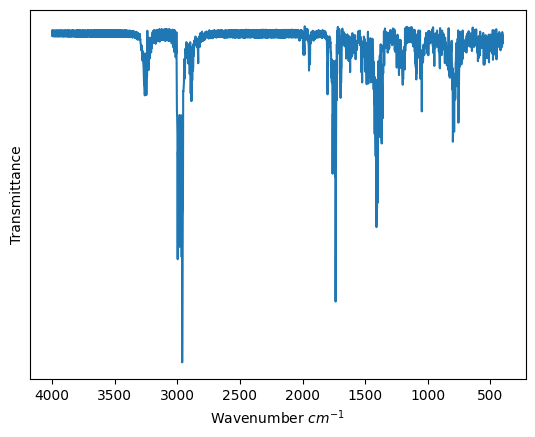

In [7]:
ir_spectrum = 1 - random_sample["ir_spectra"].tolist()[0][::-1]
ir_dimension = meta_data["ir_spectra"]["dimensions"][::-1]

fig = plt.plot(ir_dimension, ir_spectrum)
plt.xlabel("Wavenumber $cm^{-1}$")
plt.ylabel("Transmittance")
plt.gca().invert_xaxis()
plt.gca().axes.get_yaxis().set_ticks([])
plt.show()

## H-NMR Plots

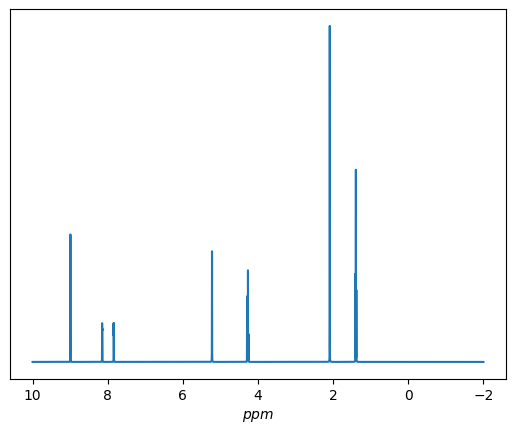

In [8]:
def plot_1H(spectrum, spec_dim, save_path=None):
    plt.plot(spec_dim, spectrum)
    plt.xlabel("$ppm$")

    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().invert_xaxis()

    if save_path is not None:
        plt.savefig(save_path / "h_nmr.png", dpi=300, bbox_inches="tight")
    plt.show()


random_sample = df.sample(1)

hnmr_spectrum = random_sample["h_nmr_spectra"].tolist()[0]
hnmr_dimension = meta_data["h_nmr_spectra"]["dimensions"]
plot_1H(hnmr_spectrum, hnmr_dimension)


## Plot C13-NMR

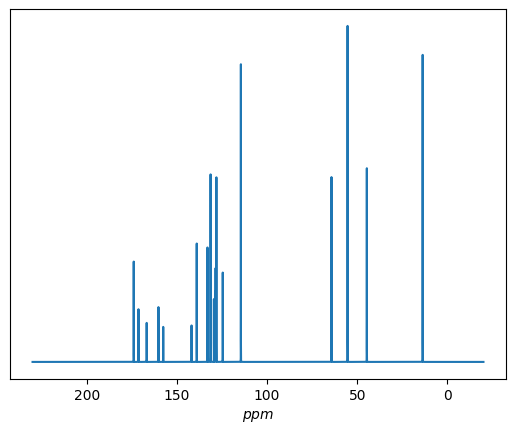

In [9]:
def plot_13C(spectrum, spec_dim, save_path=None):
    plt.plot(spec_dim, spectrum)
    plt.xlabel("$ppm$")

    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().invert_xaxis()

    if save_path is not None:
        plt.savefig(save_path / "c_nmr.png", dpi=300, bbox_inches="tight")
    plt.show()


random_sample = df.sample(1)

cnmr_spectrum = random_sample["c_nmr_spectra"].tolist()[0]
cnmr_dimension = meta_data["c_nmr_spectra"]["dimensions"]
plot_13C(cnmr_spectrum, cnmr_dimension)


## Plot MS/MS

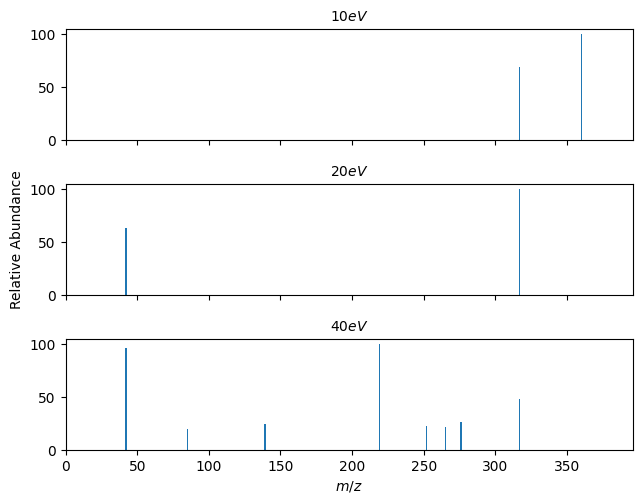

In [11]:
def plot_negative_msms(energy_0, energy_1, energy_2, save_path=None):
    figure, axis = plt.subplots(3, 1)
    figure.tight_layout()

    max_x_value = max(energy_0[:, 0]) + max(energy_0[:, 0]) * 0.1

    axis[0].bar(energy_0[:, 0], energy_0[:, 1], width=1)
    axis[0].set_xlim(0, max_x_value)
    axis[0].xaxis.set_ticklabels([])
    axis[0].set_title("$10eV$", fontsize=10)

    axis[1].bar(energy_1[:, 0], energy_1[:, 1], width=1)
    axis[1].set_xlim(0, max_x_value)
    axis[1].xaxis.set_ticklabels([])
    axis[1].set_title("$20eV$", fontsize=10)

    axis[2].bar(energy_2[:, 0], energy_2[:, 1], width=1)
    axis[2].set_xlim(0, max_x_value)
    axis[2].set_title("$40eV$", fontsize=10)

    axis[2].set_xlabel("$m/z$")
    axis[1].set_ylabel("Relative Abundance")

    if save_path is not None:
        plt.savefig(save_path / "neg_msms.png", dpi=300, bbox_inches="tight")
    plt.show()


random_sample = df.sample(1).iloc[0]

energy_10ev = np.stack(random_sample["msms_negative_10ev"])
energy_20ev = np.stack(random_sample["msms_negative_20ev"])
energy_40ev = np.stack(random_sample["msms_negative_40ev"])

plot_negative_msms(energy_10ev, energy_20ev, energy_40ev)


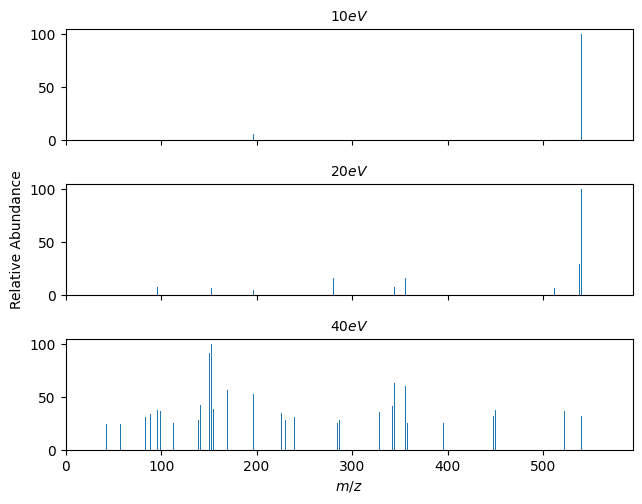

In [13]:
def plot_positive_msms(energy_0, energy_1, energy_2, save_path=None):
    figure, axis = plt.subplots(3, 1)
    figure.tight_layout()

    max_x_value = max(energy_0[:, 0]) + max(energy_0[:, 0]) * 0.1

    axis[0].bar(energy_0[:, 0], energy_0[:, 1], width=1)
    axis[0].set_xlim(0, max_x_value)
    axis[0].xaxis.set_ticklabels([])
    axis[0].set_title("$10eV$", fontsize=10)

    axis[1].bar(energy_1[:, 0], energy_1[:, 1], width=1)
    axis[1].set_xlim(0, max_x_value)
    axis[1].xaxis.set_ticklabels([])
    axis[1].set_title("$20eV$", fontsize=10)

    axis[2].bar(energy_2[:, 0], energy_2[:, 1], width=1)
    axis[2].set_xlim(0, max_x_value)
    axis[2].set_title("$40eV$", fontsize=10)

    axis[2].set_xlabel("$m/z$")
    axis[1].set_ylabel("Relative Abundance")

    if save_path is not None:
        plt.savefig(save_path / "pos_msms.png", dpi=300, bbox_inches="tight")
    plt.show()


random_sample = df.sample(1).iloc[0]

energy_10ev = np.stack(random_sample["msms_positive_10ev"])
energy_20ev = np.stack(random_sample["msms_positive_20ev"])
energy_40ev = np.stack(random_sample["msms_positive_40ev"])

plot_negative_msms(energy_10ev, energy_20ev, energy_40ev)

## Plot HSQC NMR

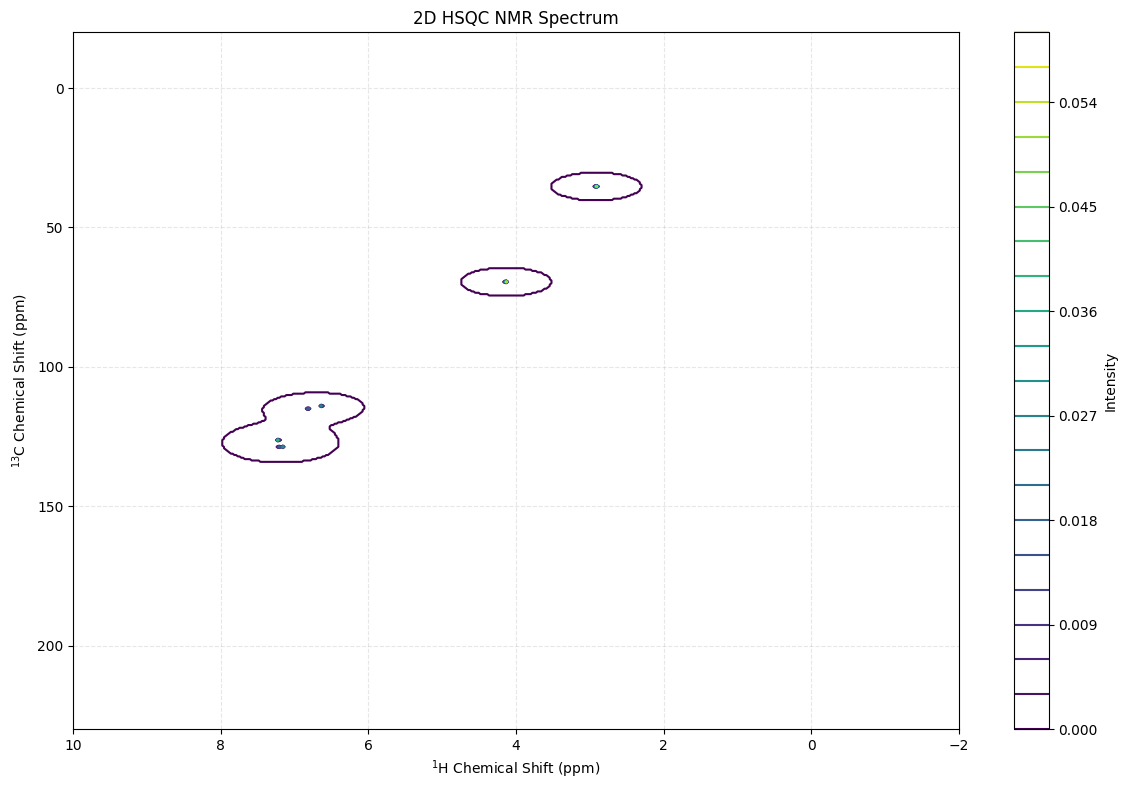

In [20]:

def plot_hsqc_spectrum(hsqc_spectrum,h_shifts, c_shifts, title="2D HSQC NMR Spectrum"):
    # Create the figure and axis
    plt.figure(figsize=(12, 8))
    
    # Create the contour plot
    plt.contour(h_shifts, c_shifts, hsqc_spectrum, 
                levels=20, 
                cmap='viridis')
    
    # Customize the plot
    plt.gca().invert_xaxis()  # Invert x-axis as per NMR convention
    plt.gca().invert_yaxis()  # Invert y-axis as per NMR convention
    
    # Add labels and title
    plt.xlabel('$^{1}$H Chemical Shift (ppm)')
    plt.ylabel('$^{13}$C Chemical Shift (ppm)')
    plt.title(title)
    
    # Add colorbar
    plt.colorbar(label='Intensity')
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    return 



random_sample = df.sample(1).iloc[0]

hsqc_spectrum = np.vstack(random_sample["hsqc_nmr_spectrum"])
h_spec_dim = meta_data['hsqc_nmr_spectrum']['dimensions']['h']
c_spec_dim = meta_data['hsqc_nmr_spectrum']['dimensions']['c']

plot_hsqc_spectrum(hsqc_spectrum, h_spec_dim, c_spec_dim)


# Data Overview and Analysis

## Dataset Structure

In [21]:
# Basic information about the dataset
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDataset shape: {df.shape}")
print(f"Number of samples: {len(df)}")
print(f"Number of features: {len(df.columns)}")
print(f"\nColumn names:")
for col in df.columns:
    print(f"  - {col}")

print(f"\nData types:")
print(df.dtypes)

print(f"\nMemory usage:")
print(df.memory_usage(deep=True))

DATASET OVERVIEW

Dataset shape: (16183, 17)
Number of samples: 16183
Number of features: 17

Column names:
  - smiles
  - hsqc_nmr_peaks
  - hsqc_nmr_spectrum
  - h_nmr_peaks
  - h_nmr_spectra
  - molecular_formula
  - c_nmr_peaks
  - ir_spectra
  - msms_positive_10ev
  - msms_positive_20ev
  - msms_positive_40ev
  - msms_fragments_positive
  - msms_negative_10ev
  - msms_negative_20ev
  - msms_negative_40ev
  - msms_fragments_negative
  - c_nmr_spectra

Data types:
smiles                        str
hsqc_nmr_peaks             object
hsqc_nmr_spectrum          object
h_nmr_peaks                object
h_nmr_spectra              object
molecular_formula             str
c_nmr_peaks                object
ir_spectra                 object
msms_positive_10ev         object
msms_positive_20ev         object
msms_positive_40ev         object
msms_fragments_positive    object
msms_negative_10ev         object
msms_negative_20ev         object
msms_negative_40ev         object
msms_fragments_neg

## Sample Data (Raw View)

In [22]:
# Display first few rows to see raw data structure
print("First 3 samples (showing only SMILES for readability):")
print(df[['smiles']].head(3))

print("\n" + "="*80)
print("Complete view of first sample:")
print("="*80)
sample = df.iloc[0]
for col in df.columns:
    value = sample[col]
    if isinstance(value, (list, np.ndarray)):
        print(f"\n{col}:")
        print(f"  Type: {type(value)}")
        print(f"  Shape: {np.array(value).shape if hasattr(value, '__len__') else 'scalar'}")
        print(f"  Sample values: {np.array(value).flat[:5]}...")
    else:
        print(f"\n{col}: {value}")

First 3 samples (showing only SMILES for readability):
                                              smiles
0  O=S(O)c1cc2c(cc1F)OC(c1ccc(F)cc1F)(c1ccc(F)cc1...
1  CN(C)Cc1cccc(C2Nc3cccc4c(=O)[nH]nc(c34)C2c2ccc...
2  O=C(N[C@@H](CO)c1nc2cc(Cl)ccc2[nH]1)c1ccc(C(=O...

Complete view of first sample:

smiles: O=S(O)c1cc2c(cc1F)OC(c1ccc(F)cc1F)(c1ccc(F)cc1F)O2

hsqc_nmr_peaks:
  Type: <class 'numpy.ndarray'>
  Shape: (5,)
  Sample values: [{'13C_centroid': 129.42765240350238, '13C_max': 130.2966646347952, '13C_min': 128.55864017220955, '1H_centroid': 7.520319468581235, '1H_max': 7.590409114927181, '1H_min': 7.450229822235289, 'nH': 1.0}
 {'13C_centroid': 112.3360140314733, '13C_max': 113.20502626276614, '13C_min': 111.46700180018046, '1H_centroid': 7.052636425350198, '1H_max': 7.122726071696144, '1H_min': 6.982546779004252, 'nH': 2.0}
 {'13C_centroid': 105.49935868266168, '13C_max': 106.36837091395452, '13C_min': 104.63034645136884, '1H_centroid': 6.955407259659516, '1H_max': 7.02549690600

## Spectral Data Statistics

In [23]:
# Calculate statistics for spectral data
spectral_columns = ['ir_spectra', 'h_nmr_spectra', 'c_nmr_spectra']

print("="*80)
print("SPECTRAL DATA STATISTICS")
print("="*80)

for col in spectral_columns:
    if col in df.columns:
        data = np.array(df[col].tolist())
        print(f"\n{col}:")
        print(f"  Shape per sample: {data.shape[1] if len(data.shape) > 1 else 'varies'}")
        print(f"  Min value: {data.min():.6f}")
        print(f"  Max value: {data.max():.6f}")
        print(f"  Mean value: {data.mean():.6f}")
        print(f"  Std deviation: {data.std():.6f}")

SPECTRAL DATA STATISTICS

ir_spectra:
  Shape per sample: 1800
  Min value: -0.320609
  Max value: 1.000000
  Mean value: 0.022702
  Std deviation: 0.069029

h_nmr_spectra:
  Shape per sample: 10000
  Min value: 0.000000
  Max value: 1.500485
  Mean value: 0.000276
  Std deviation: 0.004090

c_nmr_spectra:
  Shape per sample: 10000
  Min value: 0.000000
  Max value: 1.293054
  Mean value: 0.000110
  Std deviation: 0.002689


## Distribution of Spectral Intensities

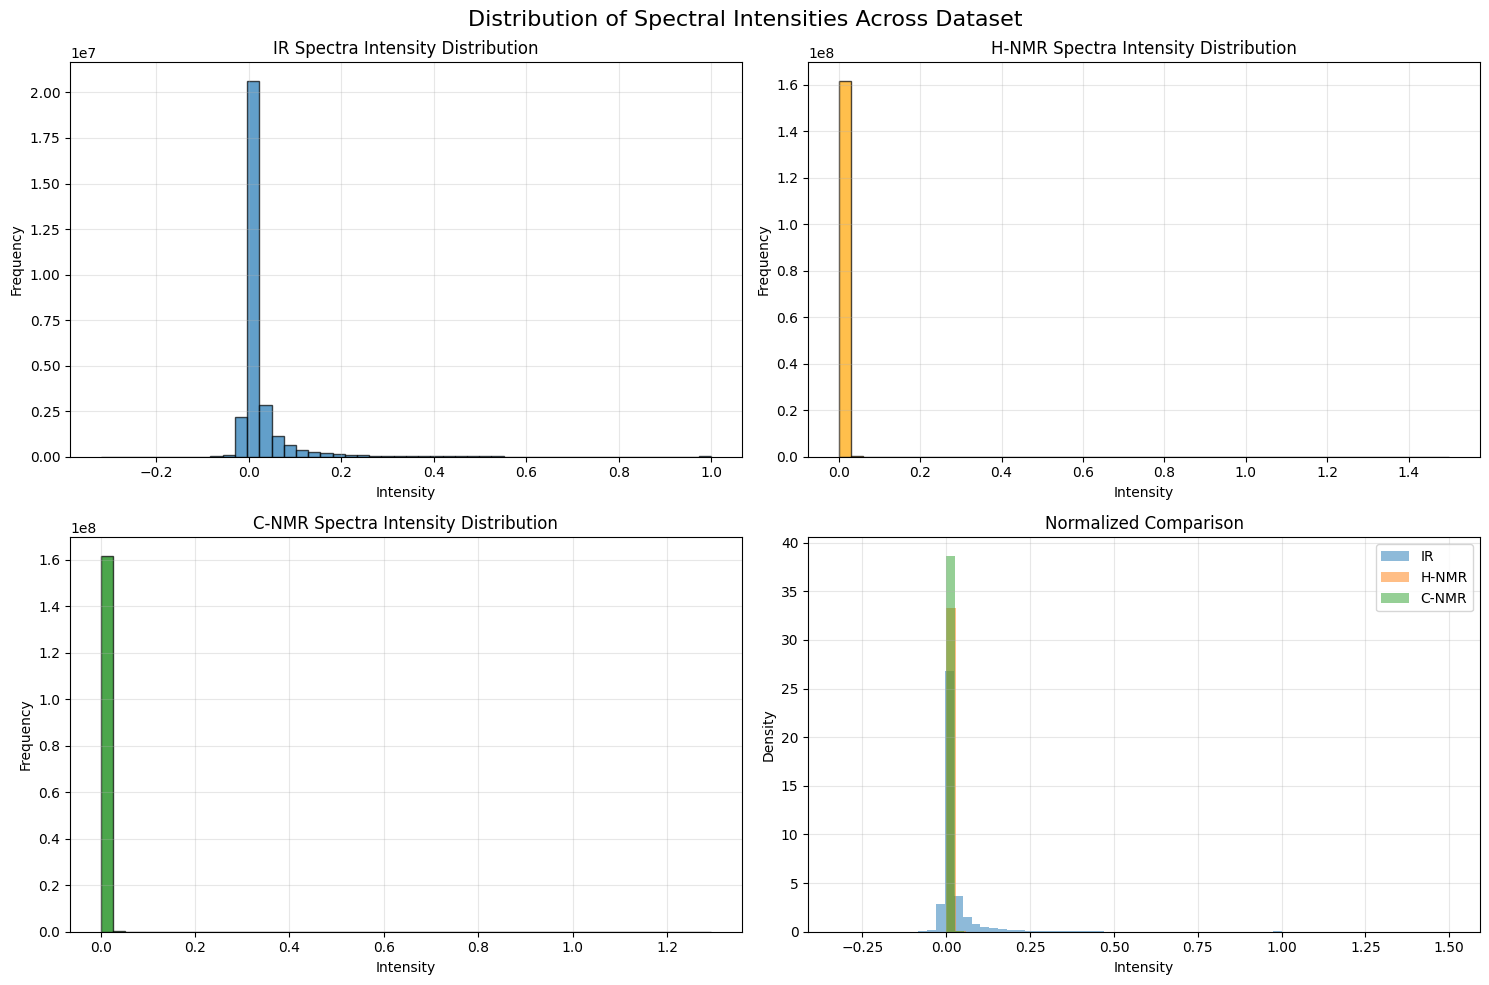

In [24]:
# Plot distributions of spectral intensities across all samples
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Spectral Intensities Across Dataset', fontsize=16)

# IR spectra
ir_data = np.array(df['ir_spectra'].tolist()).flatten()
axes[0, 0].hist(ir_data, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('IR Spectra Intensity Distribution')
axes[0, 0].set_xlabel('Intensity')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

# H-NMR spectra
hnmr_data = np.array(df['h_nmr_spectra'].tolist()).flatten()
axes[0, 1].hist(hnmr_data, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('H-NMR Spectra Intensity Distribution')
axes[0, 1].set_xlabel('Intensity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.3)

# C-NMR spectra
cnmr_data = np.array(df['c_nmr_spectra'].tolist()).flatten()
axes[1, 0].hist(cnmr_data, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('C-NMR Spectra Intensity Distribution')
axes[1, 0].set_xlabel('Intensity')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(alpha=0.3)

# Combined view (normalized)
axes[1, 1].hist(ir_data, bins=50, alpha=0.5, label='IR', density=True)
axes[1, 1].hist(hnmr_data, bins=50, alpha=0.5, label='H-NMR', density=True)
axes[1, 1].hist(cnmr_data, bins=50, alpha=0.5, label='C-NMR', density=True)
axes[1, 1].set_title('Normalized Comparison')
axes[1, 1].set_xlabel('Intensity')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Multiple Spectra Overlay Comparison

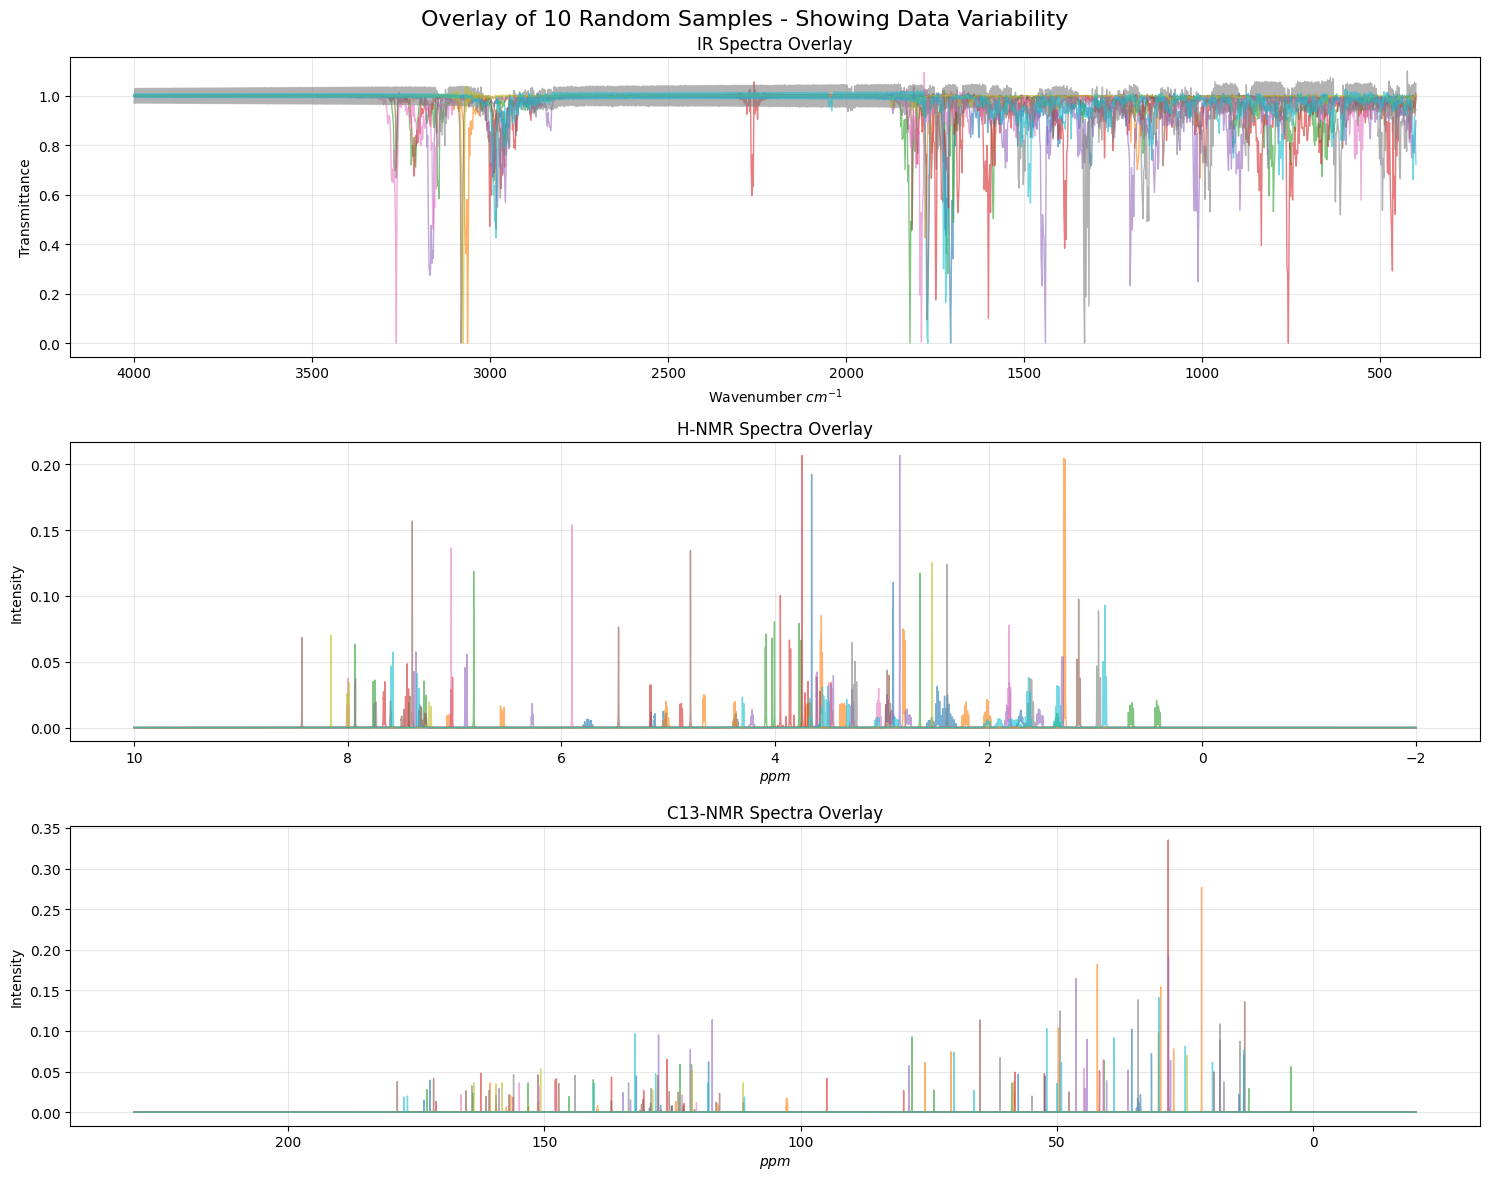

In [25]:
# Overlay multiple samples to see variability in the data
n_samples = 10
samples = df.sample(n_samples)

fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle(f'Overlay of {n_samples} Random Samples - Showing Data Variability', fontsize=16)

# IR Spectra overlay
ir_dimension = meta_data["ir_spectra"]["dimensions"][::-1]
for idx, row in samples.iterrows():
    ir_spectrum = 1 - np.array(row["ir_spectra"])[::-1]
    axes[0].plot(ir_dimension, ir_spectrum, alpha=0.6, linewidth=1)
axes[0].set_xlabel('Wavenumber $cm^{-1}$')
axes[0].set_ylabel('Transmittance')
axes[0].set_title('IR Spectra Overlay')
axes[0].invert_xaxis()
axes[0].grid(alpha=0.3)

# H-NMR overlay
hnmr_dimension = meta_data["h_nmr_spectra"]["dimensions"]
for idx, row in samples.iterrows():
    hnmr_spectrum = row["h_nmr_spectra"]
    axes[1].plot(hnmr_dimension, hnmr_spectrum, alpha=0.6, linewidth=1)
axes[1].set_xlabel('$ppm$')
axes[1].set_ylabel('Intensity')
axes[1].set_title('H-NMR Spectra Overlay')
axes[1].invert_xaxis()
axes[1].grid(alpha=0.3)

# C-NMR overlay
cnmr_dimension = meta_data["c_nmr_spectra"]["dimensions"]
for idx, row in samples.iterrows():
    cnmr_spectrum = row["c_nmr_spectra"]
    axes[2].plot(cnmr_dimension, cnmr_spectrum, alpha=0.6, linewidth=1)
axes[2].set_xlabel('$ppm$')
axes[2].set_ylabel('Intensity')
axes[2].set_title('C13-NMR Spectra Overlay')
axes[2].invert_xaxis()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Mean Spectrum with Variance Bands

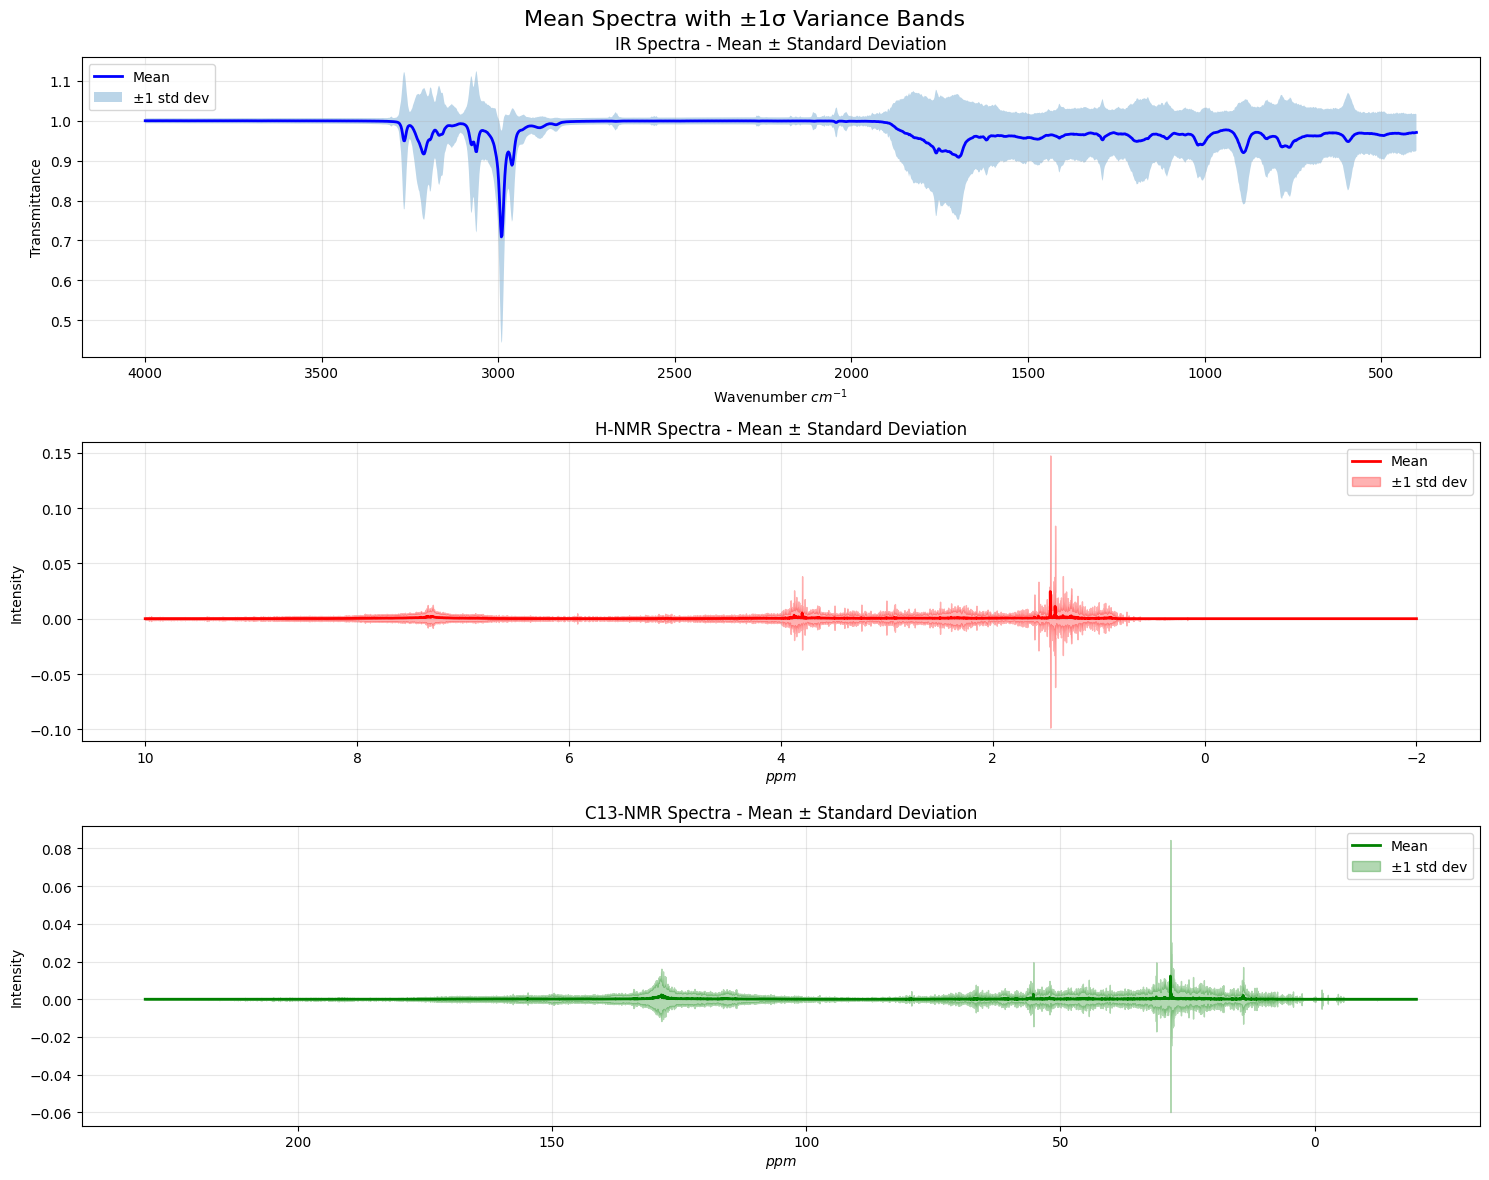

In [26]:
# Calculate mean and standard deviation across all samples
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('Mean Spectra with ±1σ Variance Bands', fontsize=16)

# IR Spectra
ir_all = np.array(df['ir_spectra'].tolist())
ir_mean = ir_all.mean(axis=0)[::-1]
ir_std = ir_all.std(axis=0)[::-1]
ir_dimension = meta_data["ir_spectra"]["dimensions"][::-1]

axes[0].plot(ir_dimension, 1 - ir_mean, 'b-', linewidth=2, label='Mean')
axes[0].fill_between(ir_dimension, 
                       1 - (ir_mean - ir_std), 
                       1 - (ir_mean + ir_std), 
                       alpha=0.3, label='±1 std dev')
axes[0].set_xlabel('Wavenumber $cm^{-1}$')
axes[0].set_ylabel('Transmittance')
axes[0].set_title('IR Spectra - Mean ± Standard Deviation')
axes[0].invert_xaxis()
axes[0].legend()
axes[0].grid(alpha=0.3)

# H-NMR Spectra
hnmr_all = np.array(df['h_nmr_spectra'].tolist())
hnmr_mean = hnmr_all.mean(axis=0)
hnmr_std = hnmr_all.std(axis=0)
hnmr_dimension = meta_data["h_nmr_spectra"]["dimensions"]

axes[1].plot(hnmr_dimension, hnmr_mean, 'r-', linewidth=2, label='Mean')
axes[1].fill_between(hnmr_dimension, 
                       hnmr_mean - hnmr_std, 
                       hnmr_mean + hnmr_std, 
                       alpha=0.3, color='red', label='±1 std dev')
axes[1].set_xlabel('$ppm$')
axes[1].set_ylabel('Intensity')
axes[1].set_title('H-NMR Spectra - Mean ± Standard Deviation')
axes[1].invert_xaxis()
axes[1].legend()
axes[1].grid(alpha=0.3)

# C-NMR Spectra
cnmr_all = np.array(df['c_nmr_spectra'].tolist())
cnmr_mean = cnmr_all.mean(axis=0)
cnmr_std = cnmr_all.std(axis=0)
cnmr_dimension = meta_data["c_nmr_spectra"]["dimensions"]

axes[2].plot(cnmr_dimension, cnmr_mean, 'g-', linewidth=2, label='Mean')
axes[2].fill_between(cnmr_dimension, 
                       cnmr_mean - cnmr_std, 
                       cnmr_mean + cnmr_std, 
                       alpha=0.3, color='green', label='±1 std dev')
axes[2].set_xlabel('$ppm$')
axes[2].set_ylabel('Intensity')
axes[2].set_title('C13-NMR Spectra - Mean ± Standard Deviation')
axes[2].invert_xaxis()
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Heatmap Visualization of Spectral Data

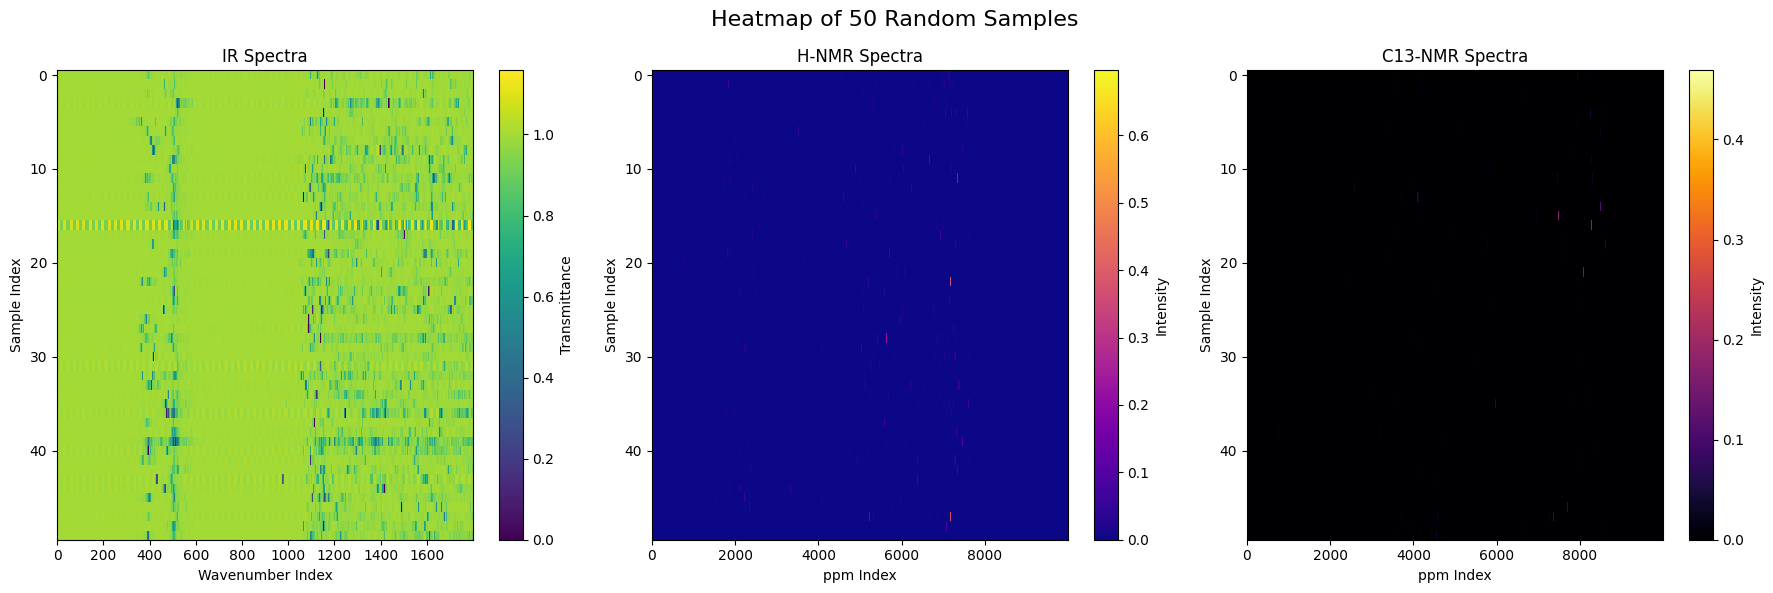

In [27]:
# Visualize multiple samples as heatmap
n_samples_heatmap = min(50, len(df))
samples_for_heatmap = df.sample(n_samples_heatmap)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f'Heatmap of {n_samples_heatmap} Random Samples', fontsize=16)

# IR Spectra heatmap
ir_heatmap = np.array([1 - np.array(row)[::-1] for row in samples_for_heatmap['ir_spectra']])
im0 = axes[0].imshow(ir_heatmap, aspect='auto', cmap='viridis', interpolation='nearest')
axes[0].set_title('IR Spectra')
axes[0].set_xlabel('Wavenumber Index')
axes[0].set_ylabel('Sample Index')
plt.colorbar(im0, ax=axes[0], label='Transmittance')

# H-NMR Spectra heatmap
hnmr_heatmap = np.array(samples_for_heatmap['h_nmr_spectra'].tolist())
im1 = axes[1].imshow(hnmr_heatmap, aspect='auto', cmap='plasma', interpolation='nearest')
axes[1].set_title('H-NMR Spectra')
axes[1].set_xlabel('ppm Index')
axes[1].set_ylabel('Sample Index')
plt.colorbar(im1, ax=axes[1], label='Intensity')

# C-NMR Spectra heatmap
cnmr_heatmap = np.array(samples_for_heatmap['c_nmr_spectra'].tolist())
im2 = axes[2].imshow(cnmr_heatmap, aspect='auto', cmap='inferno', interpolation='nearest')
axes[2].set_title('C13-NMR Spectra')
axes[2].set_xlabel('ppm Index')
axes[2].set_ylabel('Sample Index')
plt.colorbar(im2, ax=axes[2], label='Intensity')

plt.tight_layout()
plt.show()

## Box Plots - Peak Intensity Comparison

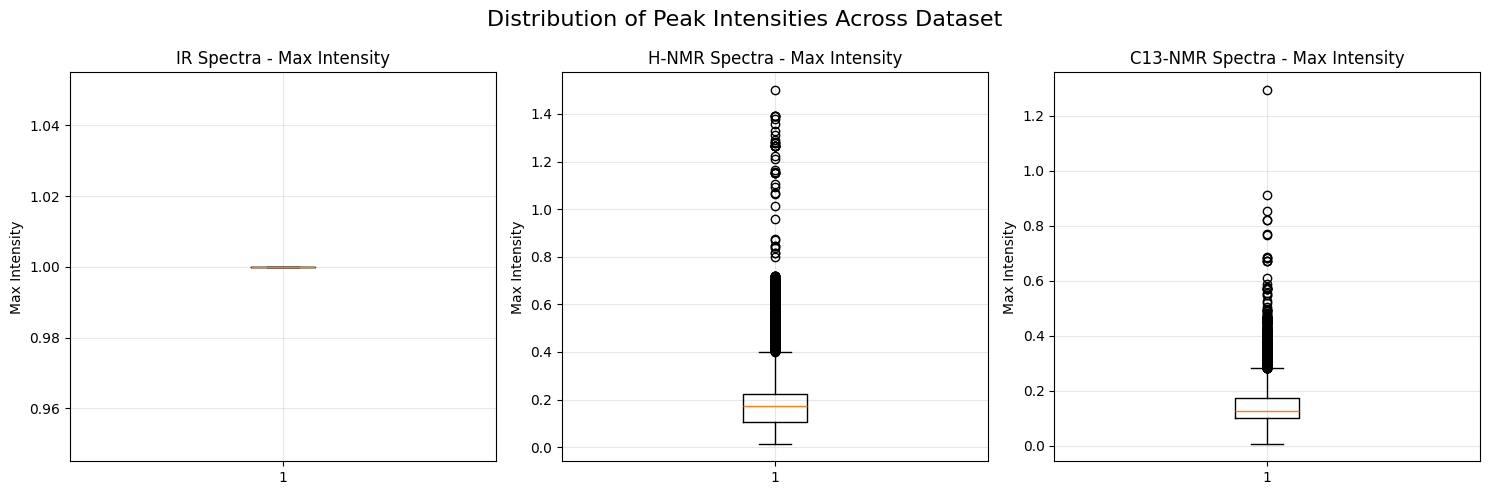

Peak Intensity Statistics:

IR - Mean: 1.0000, Median: 1.0000, Std: 0.0000
H-NMR - Mean: 0.2125, Median: 0.1733, Std: 0.1661
C-NMR - Mean: 0.1512, Median: 0.1258, Std: 0.0854


In [28]:
# Box plots showing distribution of max intensities
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Distribution of Peak Intensities Across Dataset', fontsize=16)

# IR max intensities
ir_max = [np.max(spectrum) for spectrum in df['ir_spectra']]
axes[0].boxplot(ir_max, vert=True)
axes[0].set_title('IR Spectra - Max Intensity')
axes[0].set_ylabel('Max Intensity')
axes[0].grid(alpha=0.3)

# H-NMR max intensities
hnmr_max = [np.max(spectrum) for spectrum in df['h_nmr_spectra']]
axes[1].boxplot(hnmr_max, vert=True)
axes[1].set_title('H-NMR Spectra - Max Intensity')
axes[1].set_ylabel('Max Intensity')
axes[1].grid(alpha=0.3)

# C-NMR max intensities
cnmr_max = [np.max(spectrum) for spectrum in df['c_nmr_spectra']]
axes[2].boxplot(cnmr_max, vert=True)
axes[2].set_title('C13-NMR Spectra - Max Intensity')
axes[2].set_ylabel('Max Intensity')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics
print("Peak Intensity Statistics:")
print(f"\nIR - Mean: {np.mean(ir_max):.4f}, Median: {np.median(ir_max):.4f}, Std: {np.std(ir_max):.4f}")
print(f"H-NMR - Mean: {np.mean(hnmr_max):.4f}, Median: {np.median(hnmr_max):.4f}, Std: {np.std(hnmr_max):.4f}")
print(f"C-NMR - Mean: {np.mean(cnmr_max):.4f}, Median: {np.median(cnmr_max):.4f}, Std: {np.std(cnmr_max):.4f}")

## Side-by-Side Raw Data Comparison

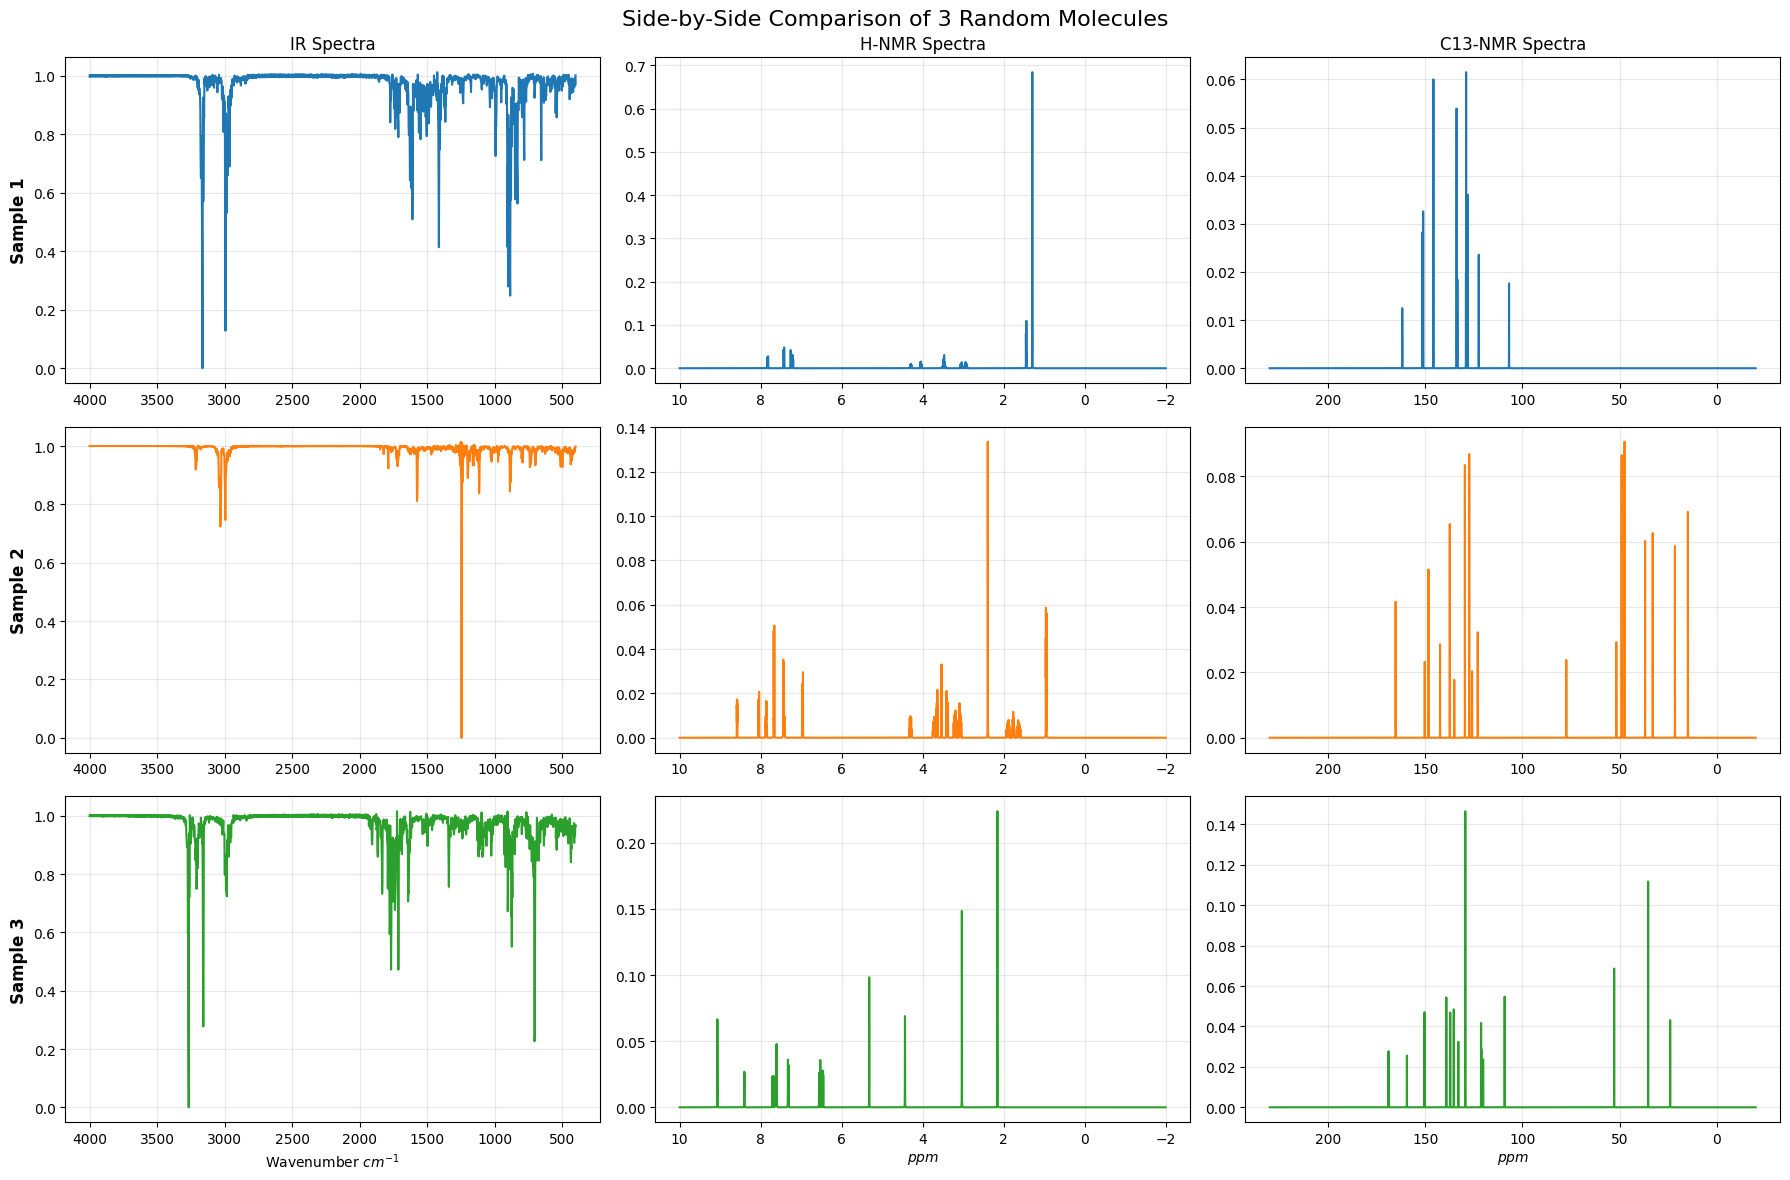


SMILES for these samples:
Sample 1: C[C@H](NCCC(=N[S@](=O)C(C)(C)C)c1ccc(F)cc1)c1ccc(Br)cc1
Sample 2: Cc1ccc(S(=O)(=O)N2CCC(C)C(O)C(NC(=O)c3ccccn3)C2)cc1
Sample 3: CC(=O)Nc1ccc(CN(C)C(=O)/C=C/c2ccc(N)nc2)cc1


In [29]:
# Compare 3 different random molecules side by side
samples_compare = df.sample(3)

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Side-by-Side Comparison of 3 Random Molecules', fontsize=16)

for i, (idx, sample) in enumerate(samples_compare.iterrows()):
    # IR Spectrum
    ir_spectrum = 1 - np.array(sample["ir_spectra"])[::-1]
    ir_dimension = meta_data["ir_spectra"]["dimensions"][::-1]
    axes[i, 0].plot(ir_dimension, ir_spectrum, color=f'C{i}')
    axes[i, 0].set_ylabel(f'Sample {i+1}', fontsize=12, fontweight='bold')
    if i == 0:
        axes[i, 0].set_title('IR Spectra')
    if i == 2:
        axes[i, 0].set_xlabel('Wavenumber $cm^{-1}$')
    axes[i, 0].invert_xaxis()
    axes[i, 0].grid(alpha=0.3)
    
    # H-NMR Spectrum
    hnmr_spectrum = sample["h_nmr_spectra"]
    hnmr_dimension = meta_data["h_nmr_spectra"]["dimensions"]
    axes[i, 1].plot(hnmr_dimension, hnmr_spectrum, color=f'C{i}')
    if i == 0:
        axes[i, 1].set_title('H-NMR Spectra')
    if i == 2:
        axes[i, 1].set_xlabel('$ppm$')
    axes[i, 1].invert_xaxis()
    axes[i, 1].grid(alpha=0.3)
    
    # C-NMR Spectrum
    cnmr_spectrum = sample["c_nmr_spectra"]
    cnmr_dimension = meta_data["c_nmr_spectra"]["dimensions"]
    axes[i, 2].plot(cnmr_dimension, cnmr_spectrum, color=f'C{i}')
    if i == 0:
        axes[i, 2].set_title('C13-NMR Spectra')
    if i == 2:
        axes[i, 2].set_xlabel('$ppm$')
    axes[i, 2].invert_xaxis()
    axes[i, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print SMILES for reference
print("\nSMILES for these samples:")
for i, (idx, sample) in enumerate(samples_compare.iterrows()):
    print(f"Sample {i+1}: {sample['smiles']}")

## MS/MS Data Analysis

MS/MS DATA ANALYSIS

Available MS/MS columns: ['msms_positive_10ev', 'msms_positive_20ev', 'msms_positive_40ev', 'msms_fragments_positive', 'msms_negative_10ev', 'msms_negative_20ev', 'msms_negative_40ev', 'msms_fragments_negative']

msms_negative_10ev:
  Shape: (2, 2)
  Number of peaks: 2
  m/z range: 363.04 - 427.01
  Intensity range: 59.8600 - 100.0000

msms_negative_20ev:
  Shape: (2, 2)
  Number of peaks: 2
  m/z range: 363.04 - 427.01
  Intensity range: 25.4800 - 100.0000

msms_negative_40ev:
  Shape: (8, 2)
  Number of peaks: 8
  m/z range: 88.97 - 427.01
  Intensity range: 26.6400 - 100.0000


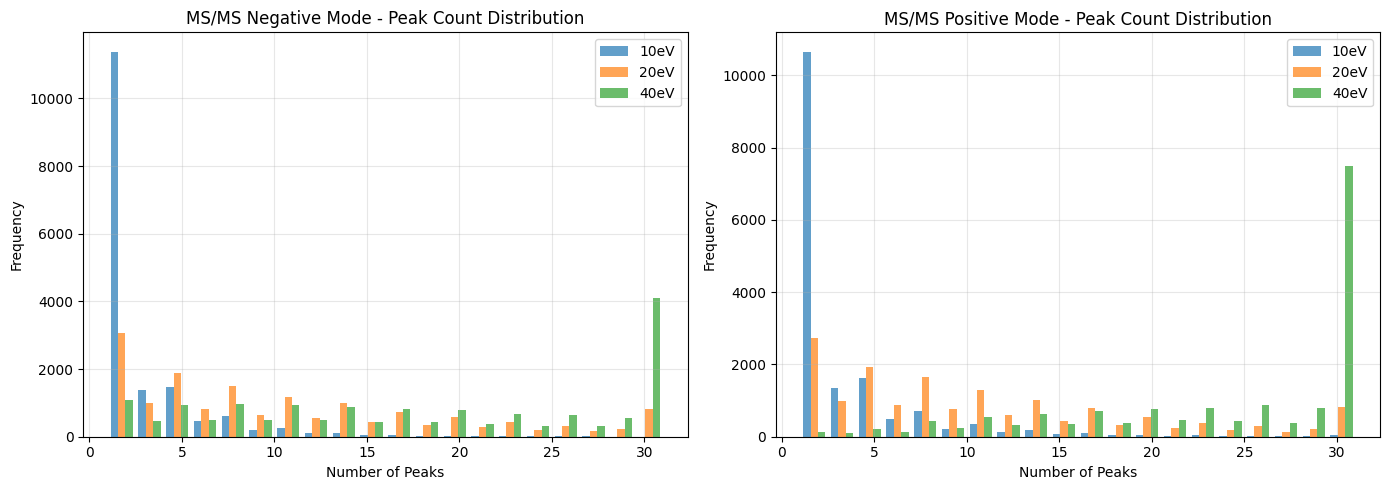

In [30]:
# Analyze MS/MS data characteristics
print("="*80)
print("MS/MS DATA ANALYSIS")
print("="*80)

# Check available MS/MS columns
msms_columns = [col for col in df.columns if 'msms' in col.lower()]
print(f"\nAvailable MS/MS columns: {msms_columns}")

# Analyze peak counts for negative mode
sample_for_msms = df.iloc[0]

for energy_col in ['msms_negative_10ev', 'msms_negative_20ev', 'msms_negative_40ev']:
    if energy_col in df.columns:
        energy_data = np.stack(sample_for_msms[energy_col])
        print(f"\n{energy_col}:")
        print(f"  Shape: {energy_data.shape}")
        print(f"  Number of peaks: {len(energy_data)}")
        print(f"  m/z range: {energy_data[:, 0].min():.2f} - {energy_data[:, 0].max():.2f}")
        print(f"  Intensity range: {energy_data[:, 1].min():.4f} - {energy_data[:, 1].max():.4f}")

# Compare peak counts across dataset
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Negative mode peak counts
neg_10ev_counts = [len(np.stack(row['msms_negative_10ev'])) for _, row in df.iterrows()]
neg_20ev_counts = [len(np.stack(row['msms_negative_20ev'])) for _, row in df.iterrows()]
neg_40ev_counts = [len(np.stack(row['msms_negative_40ev'])) for _, row in df.iterrows()]

axes[0].hist([neg_10ev_counts, neg_20ev_counts, neg_40ev_counts], 
             bins=20, label=['10eV', '20eV', '40eV'], alpha=0.7)
axes[0].set_xlabel('Number of Peaks')
axes[0].set_ylabel('Frequency')
axes[0].set_title('MS/MS Negative Mode - Peak Count Distribution')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Positive mode peak counts
pos_10ev_counts = [len(np.stack(row['msms_positive_10ev'])) for _, row in df.iterrows()]
pos_20ev_counts = [len(np.stack(row['msms_positive_20ev'])) for _, row in df.iterrows()]
pos_40ev_counts = [len(np.stack(row['msms_positive_40ev'])) for _, row in df.iterrows()]

axes[1].hist([pos_10ev_counts, pos_20ev_counts, pos_40ev_counts], 
             bins=20, label=['10eV', '20eV', '40eV'], alpha=0.7)
axes[1].set_xlabel('Number of Peaks')
axes[1].set_ylabel('Frequency')
axes[1].set_title('MS/MS Positive Mode - Peak Count Distribution')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Data Quality Check - Missing Values

In [31]:
# Check for missing or null values
print("="*80)
print("DATA QUALITY ASSESSMENT")
print("="*80)

missing_counts = df.isnull().sum()
print("\nMissing values per column:")
print(missing_counts)

total_missing = missing_counts.sum()
total_values = df.shape[0] * df.shape[1]
print(f"\nTotal missing values: {total_missing} out of {total_values} ({100*total_missing/total_values:.2f}%)")

# Visualize missing data
if total_missing > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    missing_df = df.isnull()
    ax.imshow(missing_df.T, aspect='auto', cmap='RdYlGn_r', interpolation='nearest')
    ax.set_yticks(range(len(df.columns)))
    ax.set_yticklabels(df.columns)
    ax.set_xlabel('Sample Index')
    ax.set_title('Missing Data Heatmap (Red = Missing, Green = Present)')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found in the dataset!")

DATA QUALITY ASSESSMENT

Missing values per column:
smiles                     0
hsqc_nmr_peaks             0
hsqc_nmr_spectrum          0
h_nmr_peaks                0
h_nmr_spectra              0
molecular_formula          0
c_nmr_peaks                0
ir_spectra                 0
msms_positive_10ev         0
msms_positive_20ev         0
msms_positive_40ev         0
msms_fragments_positive    0
msms_negative_10ev         0
msms_negative_20ev         0
msms_negative_40ev         0
msms_fragments_negative    0
c_nmr_spectra              0
dtype: int64

Total missing values: 0 out of 275111 (0.00%)

✓ No missing values found in the dataset!
